CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

This is the template for the submission of Assignment 2. Keep the numbering, headings and sequence intact. Add the code and text answers (Markdown cells) below the respective numbered heading.

Student name: The Trung Le 

Student ID: a1784927

Initialise environment, libraries, settings, etc.:

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from sklearn.datasets import load_breast_cancer

Load the data set:

In [3]:
data = load_breast_cancer()
wdbc = pd.DataFrame(data.data, columns = data.feature_names)
wdbc['target'] = data['target']

In [4]:
wdbc.describe(include='all')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

Answer: 

+ Radius: The average of the length of the radial line segments defined by the centroid of the snake and the individual snake points.

+ Perimeter: The total distance between the snake points.

+ Area: The number of pixels on the interior of the snake and adding one-half of the pixels in the perimeter.

+ Compactness: The result of the formula (perimeter ^ 2 /area). 

+ Smoothness: The difference between the length of a radial line and the mean length of the lines surrounding it.

+ Concavity: The magnitude of concavities measured by measuring the actual boundary of the nucleus lies on the inside of each chord. The chords is drawn between non-adjacent snake points.

+ Concave Points: The number of contour concavities.

+ Symmetry: The length difference between line perpendicular to the major axis (also the longest chord through the center) to the cell boundary in both directions.

+ Fractal Dimension: The perimeter measured by using increasing larger "rulers".

+ Texture: The variance of the gray scale intensities in the component pixels.

The reason of using:

+ Mean: In this dataset, the data distributions is continuous. Hence using mean for central tendency is better than other measures.

+ Standard error: In this dataset, represent how accurate the mean of the sample compare to the true mean is important. Hence, using the standard error is better metric than standard deviation.

+ Maximum: In a sample, there is only a few malignant cells may occur; hence those cells have extreme values and the others have non-extreme values. As a result, the extreme (largest) values is very useful for this problem.


1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

In [5]:
wdbc_M = wdbc[wdbc['target'] == 0]
wdbc_B = wdbc[wdbc['target'] == 1]

Answer:
The figure of 'Mean' columns:

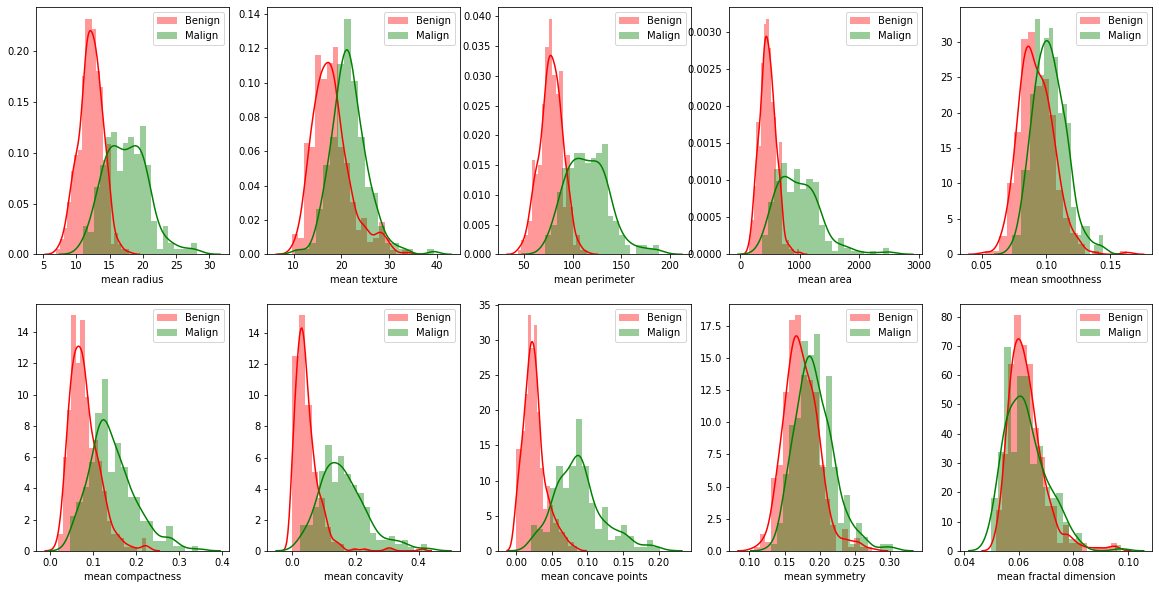

In [6]:
fig, ax = plt.subplots(2,5,figsize = (20,10))
for i in range (0,2):
    for j in range (0,5):
        sns.distplot(wdbc_B[wdbc_B.columns[i*5+j]], bins = 20, label='Benign', color='r', hist=True, ax = ax[i,j])
        sns.distplot(wdbc_M[wdbc_M.columns[i*5+j]], bins = 20, label='Malign', color='g', hist=True, ax = ax[i,j])
        ax[i,j].legend(loc = 'upper right')
plt.legend()
plt.show()

The figure of 'Standard Error' columns:

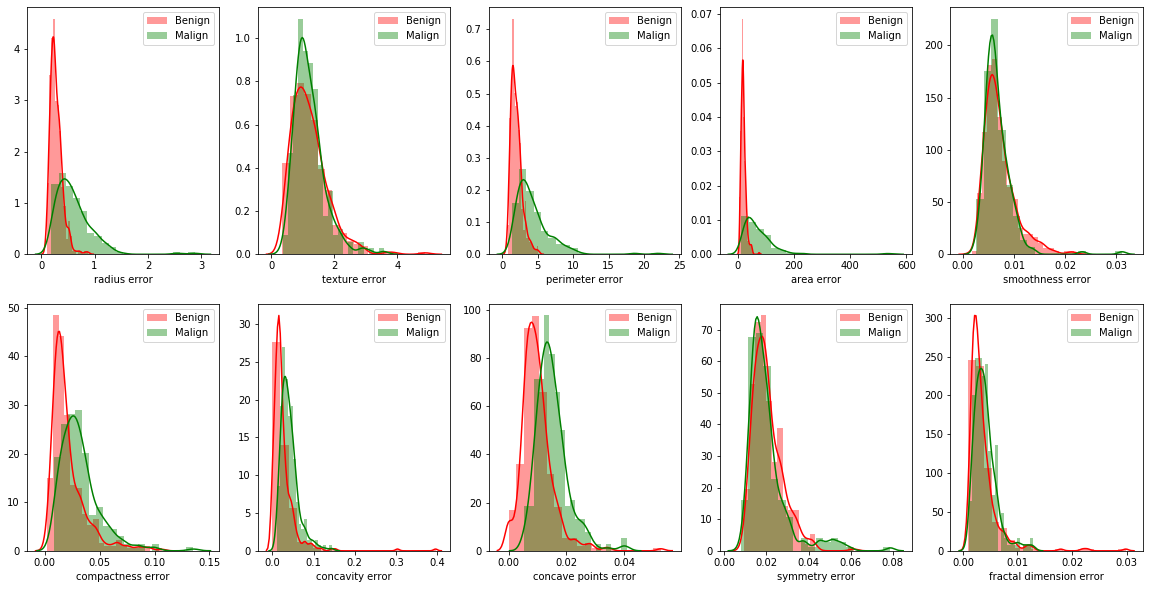

In [7]:
fig, ax = plt.subplots(2,5,figsize = (20,10))
for i in range (0,2):
    for j in range (0,5):
        sns.distplot(wdbc_B[wdbc_B.columns[i*5+j+10]], bins = 20, label='Benign', color='r', hist=True, ax = ax[i,j])
        sns.distplot(wdbc_M[wdbc_M.columns[i*5+j+10]], bins = 20, label='Malign', color='g', hist=True, ax = ax[i,j])
        ax[i,j].legend(loc = 'upper right')
plt.legend()
plt.show()

The figure of 'Worst' columns:

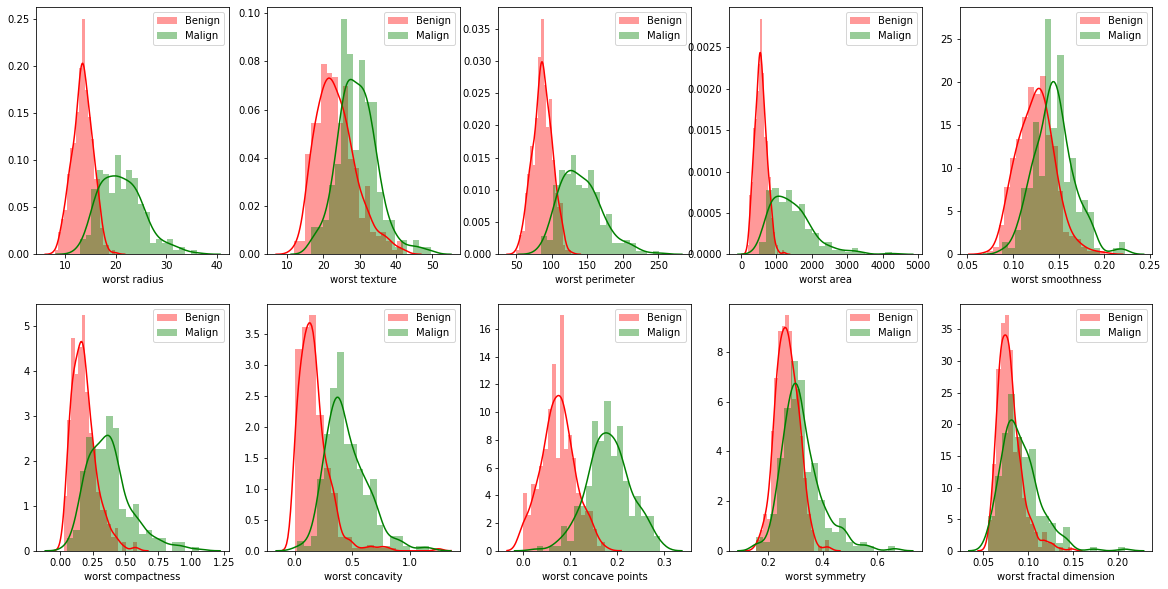

In [8]:
fig, ax = plt.subplots(2,5,figsize = (20,10))
for i in range (0,2):
    for j in range (0,5):
        sns.distplot(wdbc_B[wdbc_B.columns[i*5+j+20]], bins = 20, label='Benign', color='r', hist=True, ax = ax[i,j])
        sns.distplot(wdbc_M[wdbc_M.columns[i*5+j+20]], bins = 20, label='Malign', color='g', hist=True, ax = ax[i,j])
        ax[i,j].legend(loc = 'upper right')
plt.legend()
plt.show()

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

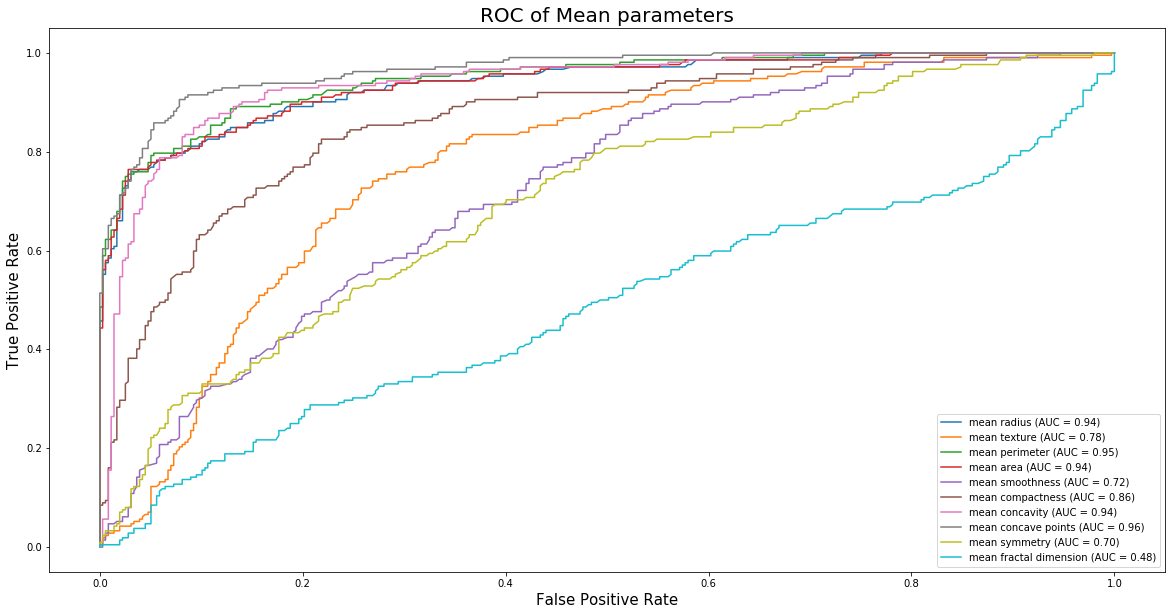

In [9]:
from sklearn.metrics import auc
from sklearn import metrics
plt.figure(figsize = (20,10))
for i in range (0,10):
        fpr, tpr, thresholds = metrics.roc_curve(wdbc['target'], wdbc[wdbc.columns[i]])
        roc_auc = auc(tpr, fpr)
        plt.plot(tpr, fpr, label = wdbc.columns[i] + ' (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize = 15) 
plt.ylabel('True Positive Rate', fontsize = 15)  
plt.title('ROC of Mean parameters', fontsize = 20)
plt.legend()

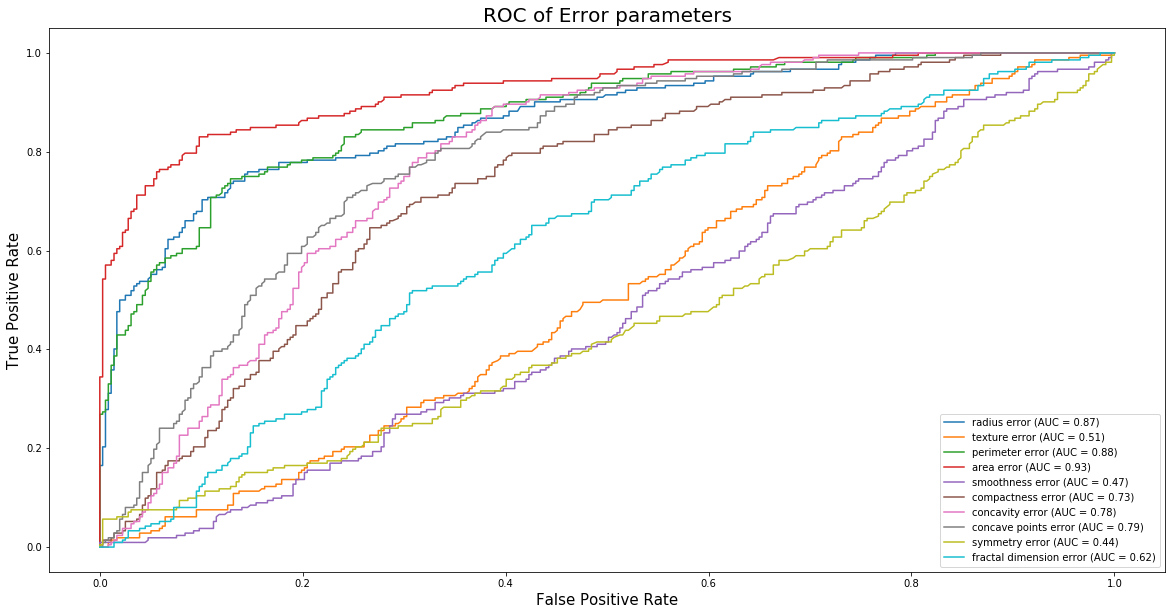

In [10]:
plt.figure(figsize = (20,10))
for i in range (0,10):
        fpr, tpr, thresholds = metrics.roc_curve(wdbc['target'], wdbc[wdbc.columns[i + 10]])
        roc_auc = auc(tpr, fpr)
        plt.plot(tpr, fpr, label = wdbc.columns[i + 10] + ' (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize = 15) 
plt.ylabel('True Positive Rate', fontsize = 15)  
plt.title('ROC of Error parameters', fontsize = 20)
plt.legend()

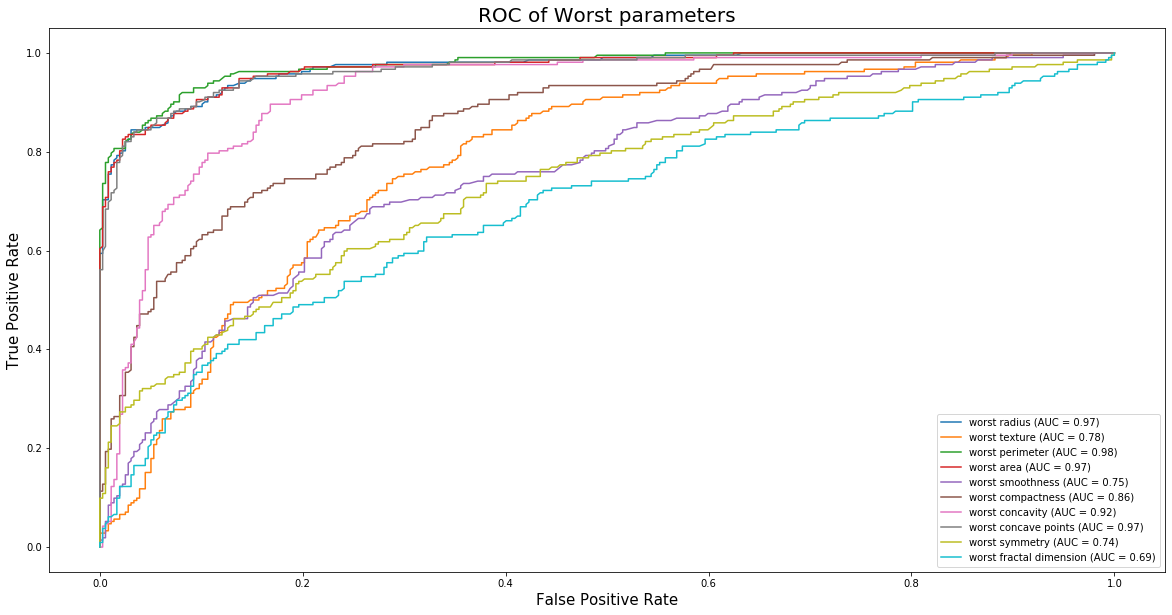

In [11]:
plt.figure(figsize = (20,10))
for i in range (0,10):
        fpr, tpr, thresholds = metrics.roc_curve(wdbc['target'], wdbc[wdbc.columns[i + 20]])
        roc_auc = auc(tpr, fpr)
        plt.plot(tpr, fpr, label = wdbc.columns[i + 20] + ' (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize = 15) 
plt.ylabel('True Positive Rate', fontsize = 15)  
plt.title('ROC of Worst parameters', fontsize = 20)
plt.legend()

1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

Answer: The reasons for choosing top five candidate features are:
+ From question 1.2, they have low areas overlap of 'Benign' class and 'Malignant' class. The lower areas they have, the better they are in separating.
+ From question 1.3, they have the largest AUC (Area Under The Curve). AUC represents degree or measure of separability. The higher AUC is, the better model is in predicting.

The top five candidate features are: mean perimeter, mean concave points, worst radius, worst perimeter and worst concave points. 

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [12]:
centre_of_mass_B = np.empty(30)
centre_of_mass_M = np.empty(30)
for i in range (0,30):
    centre_of_mass_B[i] = wdbc_B[wdbc_B.columns[i]].mean()
    centre_of_mass_M[i] = wdbc_M[wdbc_M.columns[i]].mean()
analysis_Point = (centre_of_mass_B + centre_of_mass_M)/2
print ('Analysis point:', '\n', analysis_Point)

Analysis point: 
 [1.48046770e+01 1.97598338e+01 9.67203918e+01 7.20583306e+02
 9.76880688e-02 1.12636202e-01 1.03416169e-01 5.68537031e-02
 1.83547478e-01 6.27737446e-02 4.46582450e-01 1.21564737e+00
 3.16212527e+00 4.69037771e+01 6.98799815e-03 2.68597058e-02
 3.39103725e-02 1.24590622e-02 2.05281038e-02 3.84922846e-03
 1.72573062e+01 2.64166388e+01 1.14188134e+02 9.90592880e+02
 1.34902366e-01 2.78748326e-01 3.08421644e-01 1.28340828e-01
 2.96856931e-01 8.54860128e-02]


2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dec_base = DecisionTreeClassifier(criterion = "gini", random_state = 0, class_weight = 'balanced') 

Answer:

min_samples_split: If min_samples_split is high, the model will be under-fitting the data. If min_samples_split is 1, the model will be over-fitting the dataset. Hence, choosing the default value is a good choice.

min_weight_fraction_leaf: Sample_weight is not provided for this classifier, so min_weight_fraction_leaf can be ingore.

max_features: The number of features to consider when looking for the best split. Choosing the default value can allow every feature is considered each time splitting a node.

max_leaf_nodes: Total number of leaves in a tree. Choosing max_depth parameter wisely can handle the over-fitting problem instead of this parameter, so leaving it to default is a good choice.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to min_impurity_decrease. Leaving it to default.

min_impurity_split:  A node will split if its impurity is above the min_impurity_split, otherwise it is a leaf. This parameter has been deprecated in favor of min_impurity_decrease in sklearn version 0.19, hence removing this parameter is a good choice.

class_weight = 'balanced': The dataset is imbalanced, so choose the 'balanced' for class_weight parameter can handle this problem.

2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wdbc, test_size = 0.2, random_state = 18)

In [15]:
training_features = train_set.drop(['target'], axis=1)
training_labels = train_set['target'].copy()

In [16]:
test_features = test_set.drop(['target'], axis=1)
test_labels = test_set['target'].copy()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe_steps = [('std_scaler', StandardScaler()), ('dec', dec_base)]
pipe = Pipeline(pipe_steps)
print (pipe)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dec',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=0,
                                        splitter='best'))],
         verbose=False)


Answer:

For decision tree classification, data do not need to be scaled.

The classes have the ratio of 357:212 (around 2:1) so the dataset is imbalanced. This problem may lead to the classifier that biased towards the majority class (for this dataset, it is 'Benign' class).  

Choosing the 'balanced' for class_weight parameter can handle the different class sizes problem.

2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'dec__min_samples_leaf': list(range(1,51)),
    'dec__max_depth' : list(range(1,7)),
}

grid_dec_base = GridSearchCV(pipe, param_grid = param_grid, cv = 5)
grid_dec_base.fit(training_features,training_labels)
best_max_depth = grid_dec_base.best_params_['dec__max_depth']
best_min_samples_leaf = grid_dec_base.best_params_['dec__min_samples_leaf']
print (grid_dec_base.best_params_)

{'dec__max_depth': 4, 'dec__min_samples_leaf': 1}


Answer: The reason of choosing the range for:
+ max_depth: The number of features in this dataset is 30 < 32 = 2^5. Hence, a tree with maximum height of 6 can represent all of the features. As a result, the range for max_depth is [1,6].
+ min_samples_leaf: Min samples leaf is the minimum number of samples required to be at a leaf node. For avoiding under-fitting and over-fitting problems, the range for min_samples_leaf is wide: [1,50].

From the grid search, the best value for max_depth is 4 and for min_samples_leaf is 1.


3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

In [19]:
dec = DecisionTreeClassifier(criterion = "gini", random_state = 0, class_weight = 'balanced',  
                             max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)
dec.fit(training_features, training_labels)
test_labels_predict = dec.predict(test_features)

In [20]:
from sklearn.metrics import confusion_matrix
print ('Confusion Matrix: ', '\n', confusion_matrix(test_labels, test_labels_predict))

Confusion Matrix:  
 [[40  8]
 [ 4 62]]


In [21]:
from sklearn.metrics import precision_score, recall_score
print ('Precision: ', precision_score(test_labels, test_labels_predict))
print ('Recall: ', recall_score(test_labels, test_labels_predict))

Precision:  0.8857142857142857
Recall:  0.9393939393939394


Answer:

The chance of failing to detect a sample with cancer is the miss rate (false negative rate).
Base on these metrics, the chance of failing to detect a sample with cancer is equal to 1 - recall = 6%.
So the chance of failing to detect a sample with cancer is 6%.

The strengths of this classifier:

+ This classifier does not require scaling the data.
+ This classifier is easy to explain to everyone.
+ This classifier is easy to visualize.

The weakness of this classifier:

+ This classifier is easy to overfitting the dataset.
+ This classifier is biased with imbalance dataset.

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

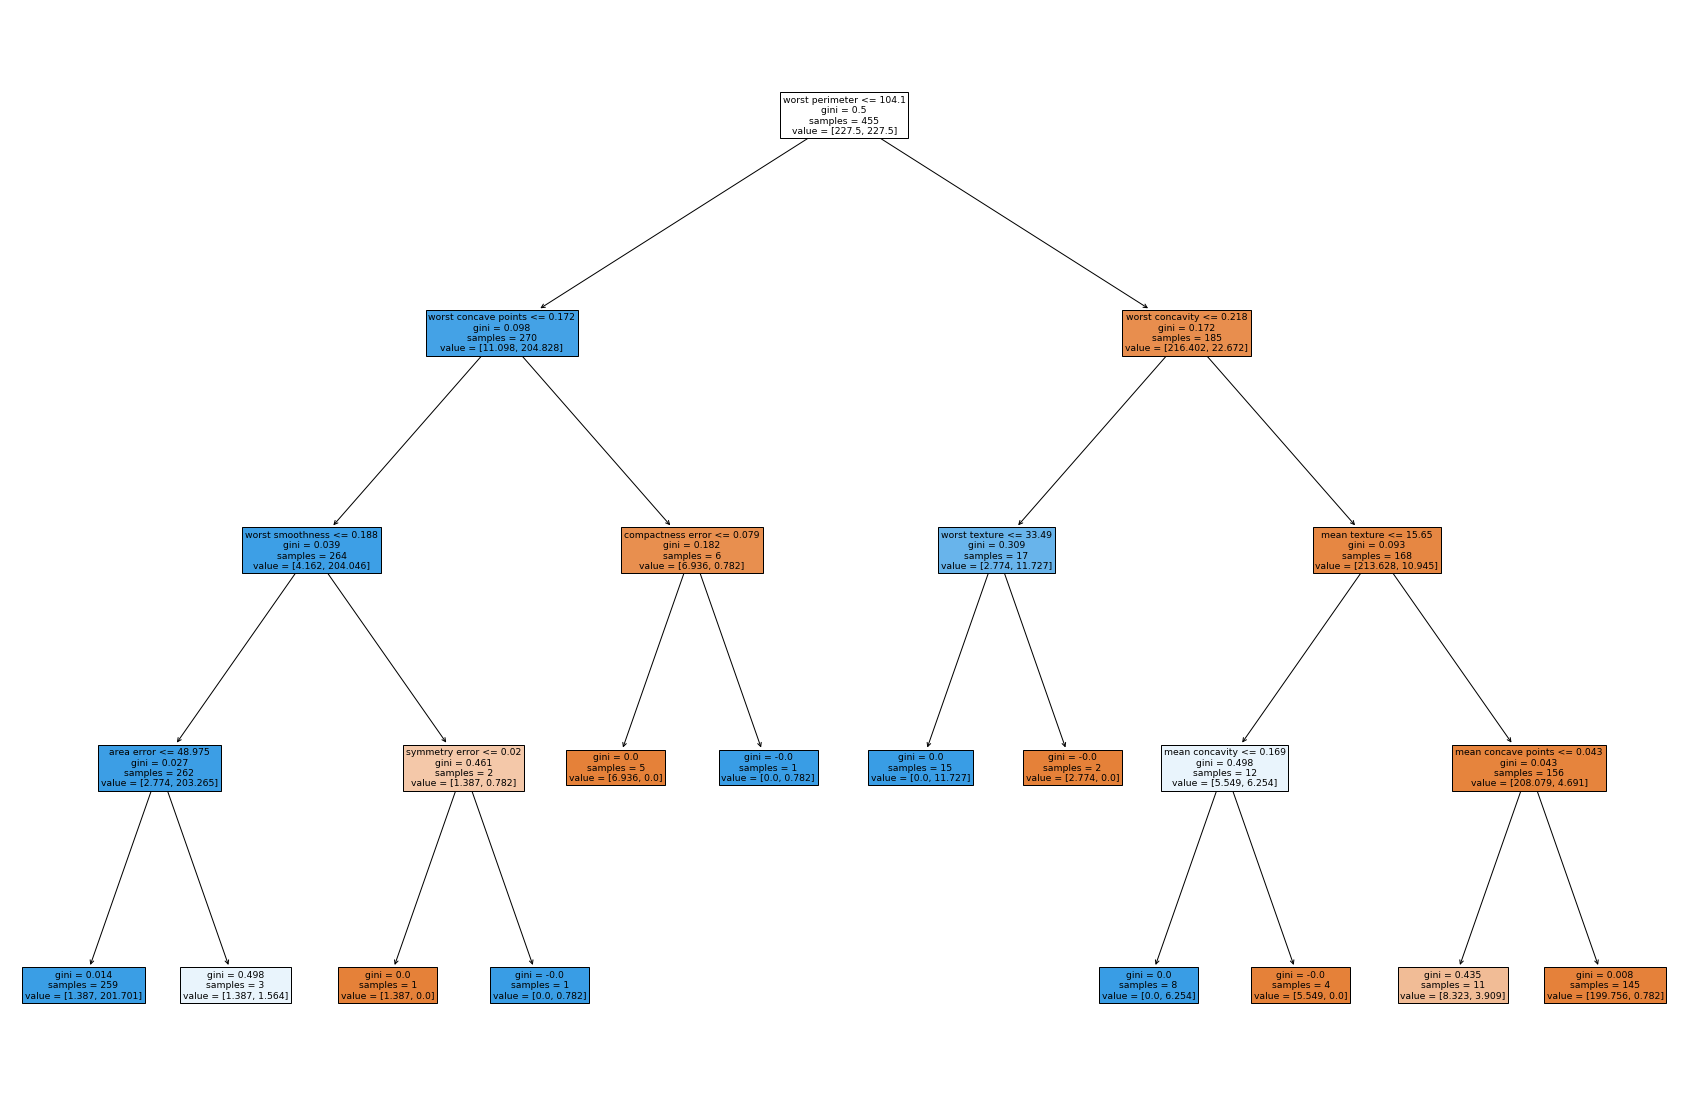

In [22]:
from sklearn.tree import plot_tree
fn = []
for i in range (0,30):
    fn.append(train_set.columns[i])
ax = plt.figure(figsize = (30,20))
ax = plot_tree(dec, feature_names = fn, filled = True)
plt.show()

Answer: This structure is a binary tree with height = 4 and the number of leaf = 12.

The meaning of the entries in the first node:

+ worst perimeter <= 104.1: The feature and its value used to split the samples.

+ gini = 0.5: The Gini Impurity is equal 0.5

+ samples = 455: The total samples

+ value = [227.5, 227.5]: 227.5 is the total class weight for both class '0' and class '1'. Because of the use of " class_weight = 'balanced' ", the total class weight total class weight for each class is equal to the total number samples of each class mutiply with the weights of each sample, which result to the same amount of total class weight for both classes.


The top 5 initial candidate features from Section 1 is: mean perimeter, mean concave points, worst radius, worst perimeter and worst concave points. 
3 out 5 are used in this decision tree is: mean concave points, worst perimeter and worst concave points. 
The mean perimeter and worst radius are not used in this decision tree.

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [23]:
importances = dict(zip(training_features.columns, dec.feature_importances_))
print(importances)

{'mean radius': 0.0, 'mean texture': 0.026655158816533946, 'mean perimeter': 0.0, 'mean area': 0.0, 'mean smoothness': 0.0, 'mean compactness': 0.0, 'mean concavity': 0.027174320021441066, 'mean concave points': 0.010617402507627143, 'mean symmetry': 0.0, 'mean fractal dimension': 0.0, 'radius error': 0.0, 'texture error': 0.0, 'perimeter error': 0.0, 'area error': 0.005769529856838369, 'smoothness error': 0.0, 'compactness error': 0.006493554699378803, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.004621127498151586, 'fractal dimension error': 0.0, 'worst radius': 0.0, 'worst texture': 0.02073582851734717, 'worst perimeter': 0.7643436144030522, 'worst area': 0.0, 'worst smoothness': 0.007776184212622427, 'worst compactness': 0.0, 'worst concavity': 0.0727054378232633, 'worst concave points': 0.05310784164374404, 'worst symmetry': 0.0, 'worst fractal dimension': 0.0}


The top five important features are: mean texture, mean concavity, worst perimeter, worst concavity and worst concave points.

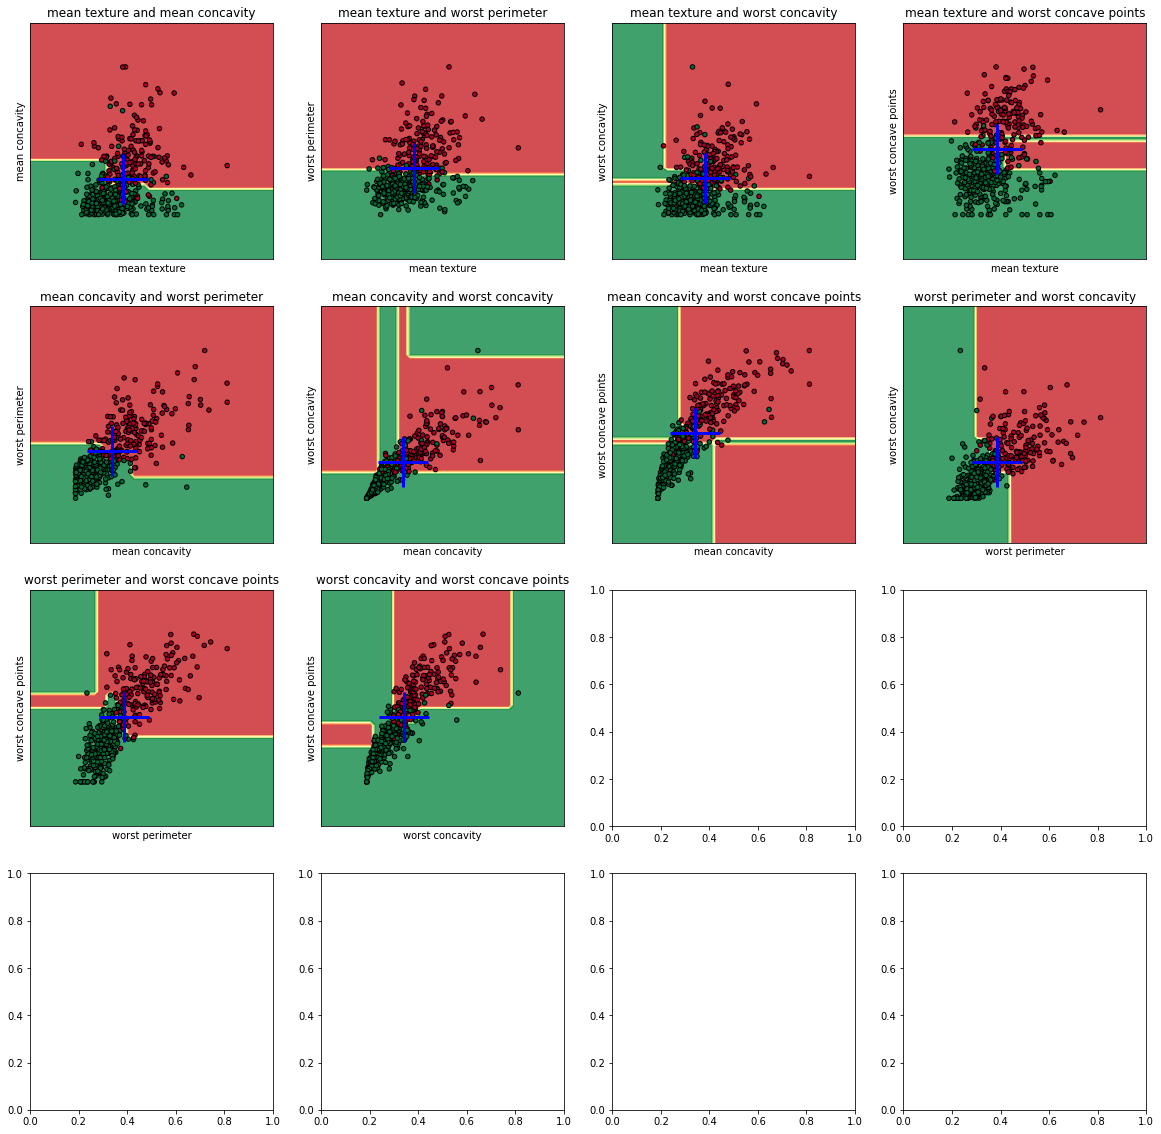

In [24]:
def make_meshgrid(x, y):

    range_x = x.max() - x.min()
    range_y = y.max() - y.min()
    x_min, x_max = x.min() - 0.3 * range_x, x.max() + 0.3 * range_x
    y_min, y_max = y.min() - 0.3 * range_y, y.max() + 0.3 * range_y
    xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                         np.linspace(y_min, y_max))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = training_features[['mean texture', 'mean concavity', 'worst perimeter', 'worst concavity', 'worst concave points']]
y = training_labels
X_index_features = [1,6,22,26,27]

fig, ax = plt.subplots(4,4,figsize = (20,20))

k = 0

for i in range (0,4):
    for j in range (i+1,5):
        pair = [i,j]
        X_2_elements = X.iloc[:,pair]
        dec.fit(X_2_elements,y)
        X0 = X[X.columns[i]]
        X1 = X[X.columns[j]]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax[k//4, k%4], dec, xx, yy, cmap= plt.cm.RdYlGn, alpha=0.8)
        ax[k//4, k%4].scatter(X0, X1, c = y, cmap = plt.cm.RdYlGn, s = 20, edgecolors='k')
        ax[k//4, k%4].set_xlim(xx.min(), xx.max())
        ax[k//4, k%4].set_ylim(yy.min(), yy.max())
        ax[k//4, k%4].set_xlabel(X.columns[i])
        ax[k//4, k%4].set_ylabel(X.columns[j])
        ax[k//4, k%4].set_xticks(())
        ax[k//4, k%4].set_yticks(())
        ax[k//4, k%4].set_title(X.columns[i] + ' and ' + X.columns[j])
        ax[k//4, k%4].plot(analysis_Point[X_index_features[i]], analysis_Point[X_index_features[j]], color = 'b', marker = '+', markersize = 50, markeredgewidth = 3)
        k = k+1
plt.show()


3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

Answer: The class differentiation is characterised better by the node threhols. It is well structured and the classification can be determine by following the flow chart. The boundary, on the other hand, has some misclassification areas.

The reason of few 2D scatterplots with only one class shown as prediction contour is: There are no separation when the model use these 2 features to predict the dataset. The model, in this case, predict every sample to 1 class, which can lead to the misclassification.

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [25]:
from sklearn.svm import SVC
svc_base = SVC(tol = 0.001, class_weight = 'balanced', max_iter = -1) 

Answer:

tol = 0.001: Choosing the default value of the tolerance for stopping criterion so that when the loss is smaller than 0.001, the svc model stops.

class_weight = 'balanced': The dataset is imbalanced, so choose the 'balanced' for class_weight parameter can handle this problem.

max_iter = -1: Choosing no limit on iterations within solver, so that the model can fit better to the data set.

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [26]:
pipe_steps_2 = [('std_scaler', StandardScaler()), ('svc', svc_base)]
pipe_2 = Pipeline(pipe_steps_2)
print (pipe_2)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [27]:
scaler = StandardScaler()
training_features_scale = scaler.fit_transform(training_features)

Answer: 

For support vector classification, the data need to be scaled because support vector machine algorithms are not scale invariant.

The classes have the ratio of 357:212 (around 2:1) so the dataset is imbalanced. This problem may lead to the classifier that biased towards the majority class (for this dataset, it is 'Benign' class).  

Choosing the 'balanced' for class_weight parameter can handle the different class sizes problem.

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [28]:
param_grid_2 = { 
    'svc__C': [0.001, 0.01, 0.1, 1 , 10, 100, 1000],
    'svc__gamma' : [0.001, 0.01, 0.1, 1 , 10, 100, 1000, "auto", "scale"]
}

grid_svc_base = GridSearchCV(pipe_2, param_grid = param_grid_2, cv = 5)
grid_svc_base.fit(training_features_scale,training_labels)
best_C = grid_svc_base.best_params_['svc__C']
best_gamma = grid_svc_base.best_params_['svc__gamma']
print (grid_svc_base.best_params_)

{'svc__C': 100, 'svc__gamma': 0.001}


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Answer:
The reason of choosing the ranges of 'C' parameter and 'gamma' parameter is: Trying exponentially growing sequences for 'C' and 'gamma' is a good method to find the best parameters for SVM models. In practice, a logarithmic grid from (10^-3) to (10^3) is usually sufficient - as mentioned in the sklearn document about RBF SVM parameters. (https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

From the grid search, the best value for C is 100 and for gamma is 0.001.

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

In [29]:
test_features_scale = scaler.fit_transform(test_features)

In [30]:
svc = SVC(C = best_C, gamma = best_gamma, tol = 0.001, class_weight = 'balanced', max_iter = -1)
svc.fit(training_features_scale, training_labels)
test_labels_predict = svc.predict(test_features_scale)
print (svc.score(test_features_scale, test_labels))

0.9912280701754386


In [31]:
print ('Confusion Matrix:', '\n', confusion_matrix(test_labels, test_labels_predict))

Confusion Matrix: 
 [[47  1]
 [ 0 66]]


In [32]:
from sklearn.metrics import precision_score, recall_score
print ('Precision: ', precision_score(test_labels, test_labels_predict))
print ('Recall: ', recall_score(test_labels, test_labels_predict))

Precision:  0.9850746268656716
Recall:  1.0


Answer: 

The chance of failing to detect a sample with cancer is the miss rate (false negative rate).
Base on these metrics, the chance of failing to detect a sample with cancer is equal to 1 - recall = 0.
So the chance of failing to detect a sample with cancer is 0.

The strengths of this classifier:

+ This classifier works very well on small datasets, on non-linear datasets and high dimensional spaces.
+ This classifier has high accuracy.
+ This classifier is not easy to overfitting.
+ The extreme values have less impact to this classifier.

The weakness of this classifier:

+ This classifier does not work well on large datasets.
+ This classifier does not work well when the datasets has overlapped classes.


5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

In [33]:
X1 = training_features[['mean texture', 'mean concavity', 'worst perimeter', 'worst concavity', 'worst concave points']]
X2 = scaler.fit_transform(X1)
X = pd.DataFrame(data = X2, columns = ['mean texture', 'mean concavity', 'worst perimeter', 'worst concavity', 'worst concave points'])

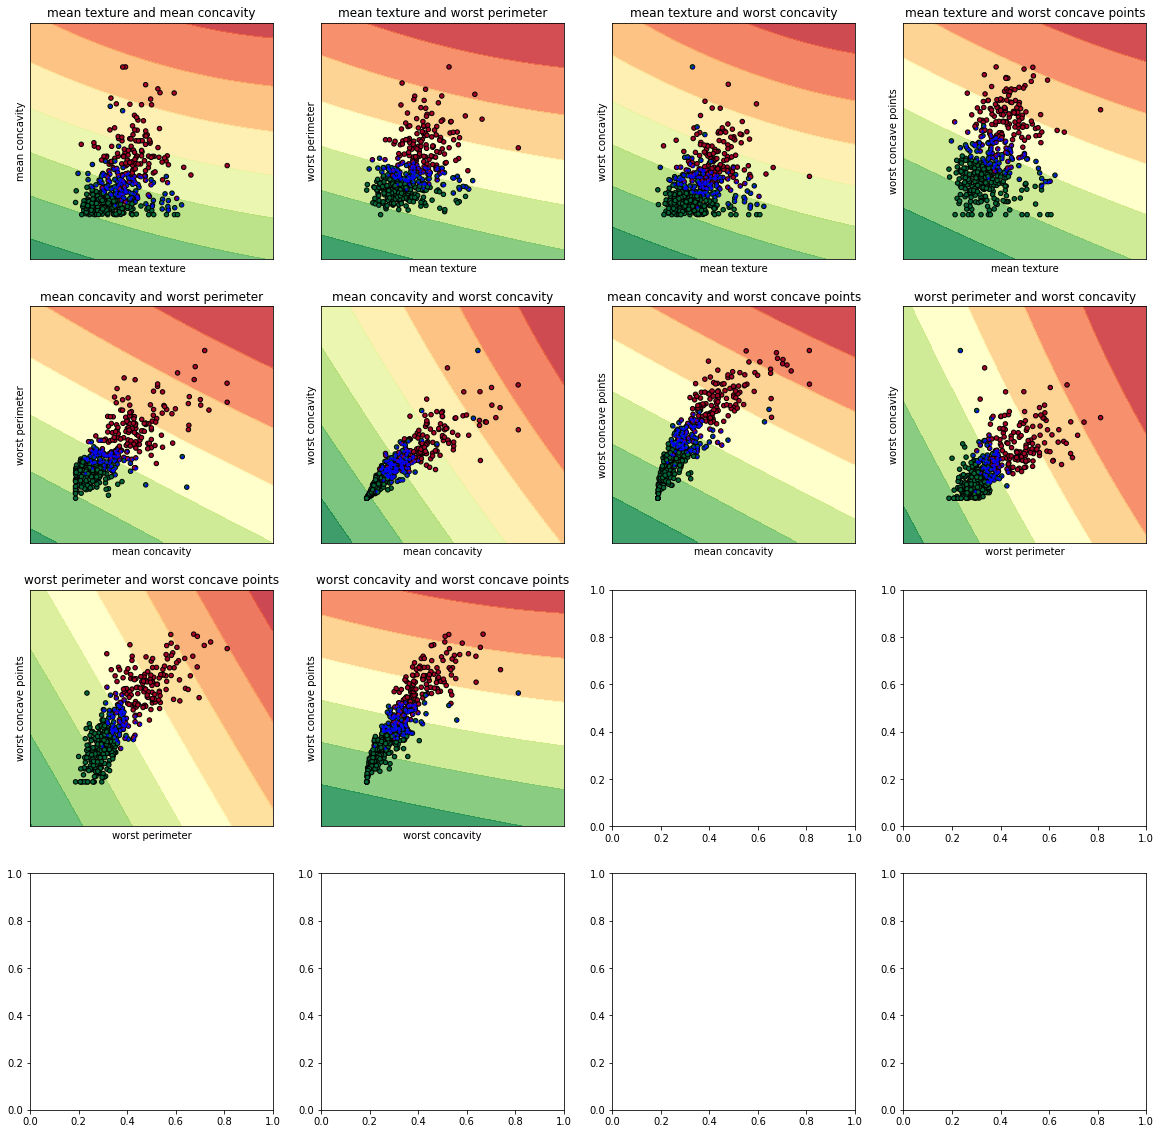

In [34]:
y = training_labels

fig, ax = plt.subplots(4,4,figsize = (20,20))

k = 0

def plot_contours_2(ax, clf, xx, yy, **params):

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

k = 0

for i in range (0,4):
    for j in range (i+1,5):
        pair = [i,j]
        X_2_elements = X.iloc[:,pair]
        svc.fit(X_2_elements,y)
        X0 = X[X.columns[i]]
        X1 = X[X.columns[j]]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours_2(ax[k//4, k%4], svc, xx, yy, cmap = plt.cm.RdYlGn, alpha = 0.8)
        ax[k//4, k%4].scatter(X0, X1, c = y, cmap = plt.cm.RdYlGn, s = 20, edgecolors='k')
        ax[k//4, k%4].set_xlim(xx.min(), xx.max())
        ax[k//4, k%4].set_ylim(yy.min(), yy.max())
        ax[k//4, k%4].set_xlabel(X.columns[i])
        ax[k//4, k%4].set_ylabel(X.columns[j])
        ax[k//4, k%4].set_xticks(())
        ax[k//4, k%4].set_yticks(())
        ax[k//4, k%4].set_title(X.columns[i] + ' and ' + X.columns[j])
        ax[k//4, k%4].scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], s = 2, color = 'blue')
        k = k+1
plt.show()

Answer: The support vectors are the blue points in the figures.

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

Answer: 

The support vectors are the data points that defines the position and the margin of the hyperplane.

The data points which are on the margin of each classes on the decision boundary are the support vectors.

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer: 

The support machine classifier has better prediction than decision tree classifier.

The analysis point for both classifier are near the center of the decision boundaries.

The decision boundary of decision tree classifier is more of shape lines and boxes while the decision boundary of support machine classifier can be any random shapes.

The decision tree classifier is classifier better than the support machine classifier outside the areas of dense sampling in the parameter space.


6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

In [35]:
dec.fit(training_features, training_labels)
print('Training score of decision tree classifiers: ', dec.score(training_features, training_labels))
print('Test score of decision tree classifiers: ', dec.score(test_features, test_labels))

Training score of decision tree classifiers:  0.9824175824175824
Test score of decision tree classifiers:  0.8947368421052632


In [36]:
svc.fit(training_features_scale, training_labels)
print('Training score of support vector classifiers: ', svc.score(training_features_scale, training_labels))
print('Test score of support vector classifiers: ', svc.score(test_features_scale, test_labels))

Training score of support vector classifiers:  0.9868131868131869
Test score of support vector classifiers:  0.9912280701754386


Answer: 

The training score -> test score of decision tree classifiers is 98.24% -> 89.47% (decreasing of around 9%)

The training score -> test score of support vector classifiers is 98.68% -> 99.12% (increasing of around 0.5%)

From the training score -> test score, decision tree classifiers is overfitting the data more than the support vector classifiers. Hence, decision tree classifiers is more bias than support vector classifiers, so support vector classifiers is better generalizability than decision tree classifiers.


6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer:

My decision tree classifier used 11 features, higher than any set of features in the table. 

SE Area, SE Compactness, W Concave Pts, M Texture, W Concavity are the features that both used in my decision tree classifier and the classifiers in the table.

The accuracy of this classifier is 89% in test set, higher than any accuracy of the classifiers in the table.

Except for the set with only one feature, the other sets have at least 1 shape feature and 1 size feature. Hence, there is a pattern of similar feature combinations in this table (at least 1 shape feature and 1 size feature in the combination).